In [13]:
import os
import sys

sys.path.append(os.path.abspath("../common"))  # add path to common functions
from evaluate import evaluate_predictions
from preprocess import getdfs
from preprocess import one_hot_encode
from models import predict_logistic_regression
from models import grid_search_
from models import predict_xgboost

In [7]:
train_df, test_df = getdfs("emoticon")
y_train = train_df["label"]
y_test = test_df["label"]

In [8]:
# Create one-hot encoding of the dataset

oh_X_train, oh_X_val, y_train, y_val = one_hot_encode(train_df, test_df)

              precision    recall  f1-score   support

     Class 0       0.91      0.88      0.89       252
     Class 1       0.88      0.90      0.89       237

    accuracy                           0.89       489
   macro avg       0.89      0.89      0.89       489
weighted avg       0.89      0.89      0.89       489



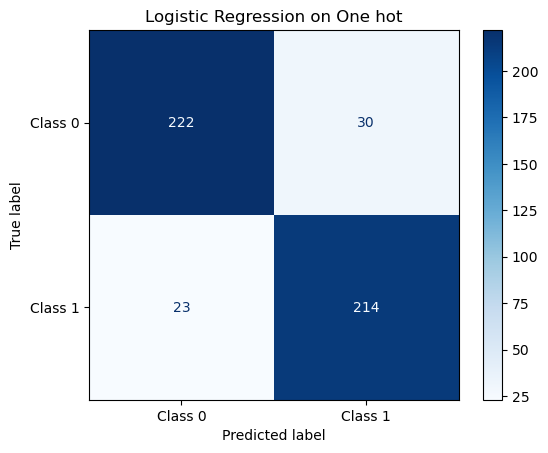

Accuracy is 0.8916155419222904


In [9]:
oh_y_pred = predict_logistic_regression(oh_X_train, y_train, oh_X_val)

evaluate_predictions(y_val, oh_y_pred, "Logistic Regression on One hot")

hyperparameter tuning

In [11]:
from sklearn.linear_model import LogisticRegression
param_grid = {
    "C": [0.01, 10, 100],  # Regularization strengths
    "penalty": ["l1", "l2"],  # Regularization type
    "solver": ["liblinear", "saga"],  # Solvers available for logistic regression
}
grid_search_(LogisticRegression(max_iter=1000), oh_X_train, y_train, param_grid)

/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/miniconda3/envs/cs771/lib/python3.12/sit

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8841807909604521
